[@LorenaABarba](https://twitter.com/LorenaABarba)

In [23]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

***12 étapes vers Navier–Stokes***
=====
***

Vous devez avoir terminé votre propre code pour l'[Étape 5](./07_Step_5.ipynb) avant de poursuivre cette leçon. Comme pour les étapes 1 à 4, nous allons construire progressivement, il est donc important de terminer l'étape précédente !

Nous continuons ...

Étape 6 : Convection en 2D
----
***

Nous résolvons maintenant la convection 2D, représentée par la paire d'équations aux dérivées partielles couplées ci-dessous :

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

La discrétisation de ces équations à l'aide des méthodes que nous avons appliquées précédemment donne :

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

En réorganisant les deux équations, nous résolvons pour $u_{i,j}^{n+1}$ et $v_{i,j}^{n+1}$, respectivement. Notez que ces équations sont également couplées.

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^ n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j- 1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^ n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j- 1}^n)$$

### Conditions Initiales

Les conditions initiales sont les mêmes que celles que nous avons utilisées pour la convection 1D, appliquées dans les directions x et y.

$$u,\ v\ = \begin{cases}\begin{matrix}
2 & \text{pour } x,y \in (0.5, 1)\times(0.5,1) \cr
1 & \text{partout ailleurs}
\end{matrix}\end{cases}$$

### Conditions aux limites

Les conditions aux limites maintiennent u et v égaux à 1 le long des frontières de la grille
$$u = 1,\ v = 1 \text{ pour } \begin{cases} \begin{matrix}x=0,2\cr y=0,2 \end{matrix}\end{cases}$$

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import numpy
%matplotlib inline

In [25]:
### déclaration des variables 
nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx)) ##crée un vecteur  1xn rempli de 1s.
v = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))
vn = numpy.ones((ny, nx))

### Conditions Initiales C.I.
## C.I. fonction chapeau : u(.5<=x<=1 && .5<=y<=1 ) =  2
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

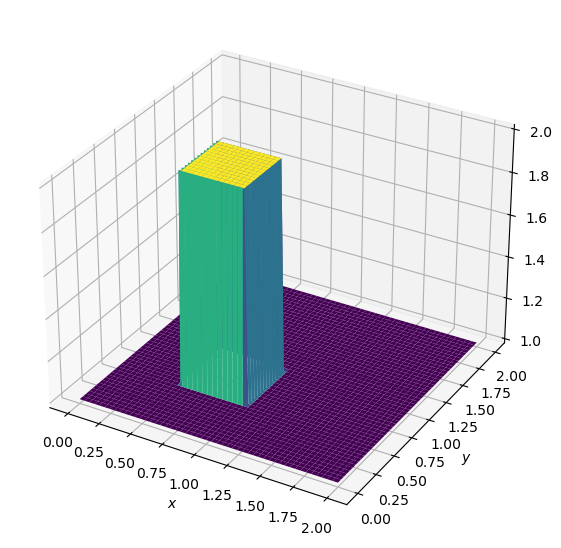

In [26]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d') #fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [27]:
for n in range(nt + 1): ## boucle sur les instants à calculer
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = (un[1:, 1:] - 
                 (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                  vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
    v[1:, 1:] = (vn[1:, 1:] -
                 (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) -
                 vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))
    
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

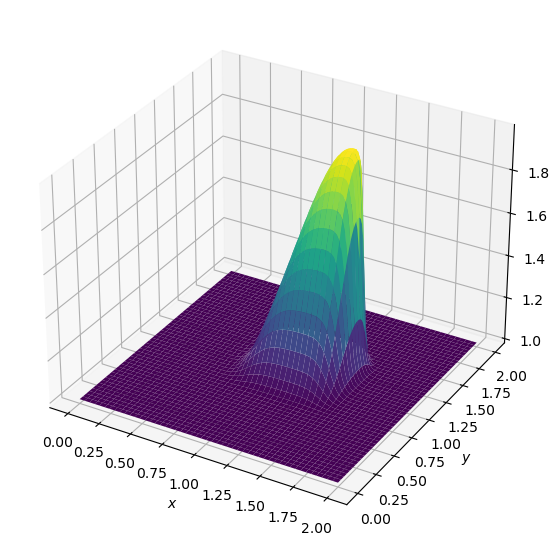

In [28]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d') 
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

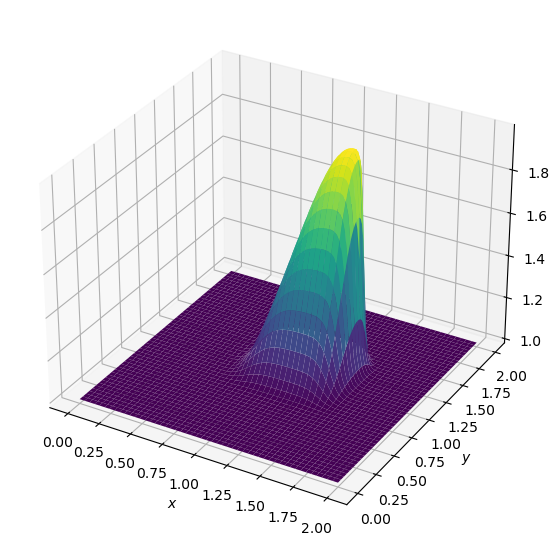

In [29]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d') #fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

##  Pour aller plus loin ...

La leçon vidéo qui vous guide à travers les détails des étapes 5 à 8 est la **Leçon  6** sur You Tube :

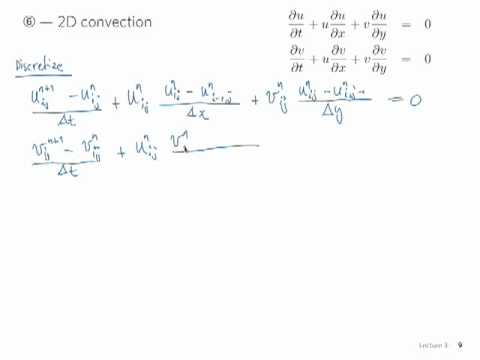

In [30]:
from IPython.display import YouTubeVideo
YouTubeVideo('tUg_dE3NXoY')

In [31]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()


> (La cellule ci-dessus exécute le style de ce bloc-notes.)